In [42]:
import os
import pandas as pd
from google.cloud import bigquery
import db_dtypes

#scenic-outcome-453219-h5-4c318c9a7175
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="scenic-outcome-453219-h5-4c318c9a7175.json"
client = bigquery.Client() 

pd.set_option('display.max_columns', None)  # wyłącz limit na kolumny
pd.set_option('display.max_rows', None)  # wyłącz limit na wiersze
pd.set_option('display.width', None)  # wyłącz limit na szerokość
pd.set_option('display.max_colwidth', None)  # wyłącz limit na szerokość kolumn
# client = bigquery.Client()

In [60]:
query = ('select * from bigquery-public-data.covid19_open_data.covid19_open_data limit 20')
query_job = client.query(query)
query_result = query_job.result()
df = query_result.to_dataframe()

In [61]:
df

,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,gdp_usd,gdp_per_capita_usd,openstreetmap_id,latitude,longitude,area_sq_km,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,nurses_per_1000,physicians_per_1000,health_expenditure_usd,out_of_pocket_health_expenditure_usd,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity,new_tested,population_largest_city,population_clustered,human_capital_index,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,hospital_beds_per_1000,subregion1_code,subregion1_name,new_recovered,cumulative_recovered,elevation_m,new_hospitalized_patients,cumulative_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,new_confirmed_age_0,new_confirmed_age_1,new_confirmed_age_2,new_confirmed_age_3,new_confirmed_age_4,new_confirmed_age_5,new_confirmed_age_6,new_confirmed_age_7,new_confirmed_age_8,new_confirmed_age_9,cumulative_confirmed_age_0,cumulative_confirmed_age_1,cumulative_confirmed_age_2,cumulative_confirmed_age_3,cumulative_confirmed_age_4,cumulative_confirmed_age_5,cumulative_confirmed_age_6,cumulative_confirmed_age_7,cumulative_confirmed_age_8,cumulative_confirmed_age_9,new_deceased_age_0,new_deceased_age_1,new_deceased_age_2,new_deceased_age_3,new_deceased_age_4,new_deceased_age_5,new_deceased_age_6,new_deceased_age_7,new_deceased_age_8,new_deceased_age_9,cumulative_deceased_age_0,cumulative_deceased_age_1,cumulative_deceased_age_2,cumulative_deceased_age_3,cumulative_deceased_age_4,cumulative_deceased_age_5,cumulative_deceased_age_6,cumulative_deceased_age_7,cumulative_deceased_age_8,cumulative_deceased_age_9,new_tested_age_0,new_tested_age_1,new_tested_age_2,new_tested_age_3,new_tested_age_4,new_tested_age_5,new_tested_age_6,new_tested_age_7,new_tested_age_8,new_tested_age_9,cumulative_tested_age_0,cumulative_tested_age_1,cumulative_tested_age_2,cumulative_tested_age_3,cumulative_tested_age_4,cumulative_tested_age_5,cumulative_tested_age_6,cumulative_tested_age_7,cumulative_tested_age_8,cumulative_tested_age_9,new_hospitalized_patients_age_0,new_hospitalized_patients_age_1,new_hospitalized_patients_age_2,new_hospitalized_patients_age_3,new_hospitalized_patients_age_4,new_hospitalized_patients_age_5,new_hospitalized_patients_age_6,new_hospitalized_patients_age_7,new_hospitalized_patients_age_8,new_hospitalized_patients_age_9,cumulative_hospitalized_patients_age_0,cumulative_hospitalized_patients_age_1,cumulative_hospitalized_patients_age_2,cumulative_hospitalized_patients_age_3,cumulative_hospitalized_patients_age_4,cumulative_hospitalized_patie

In [62]:
#Lista wszystkich kolumn
query = """
    SELECT column_name
    FROM `bigquery-public-data.covid19_open_data.INFORMATION_SCHEMA.COLUMNS`
    WHERE table_name = 'covid19_open_data'
"""
query_job = client.query(query)
columns_df = query_job.result().to_dataframe()

columns_df

,column_name
0,location_key
1,date
2,place_id
3,wikidata_id
4,datacommons_id
5,country_code
6,country_name
7,iso_3166_1_alpha_2
8,iso_3166_1_alpha_3
9,aggregation_level


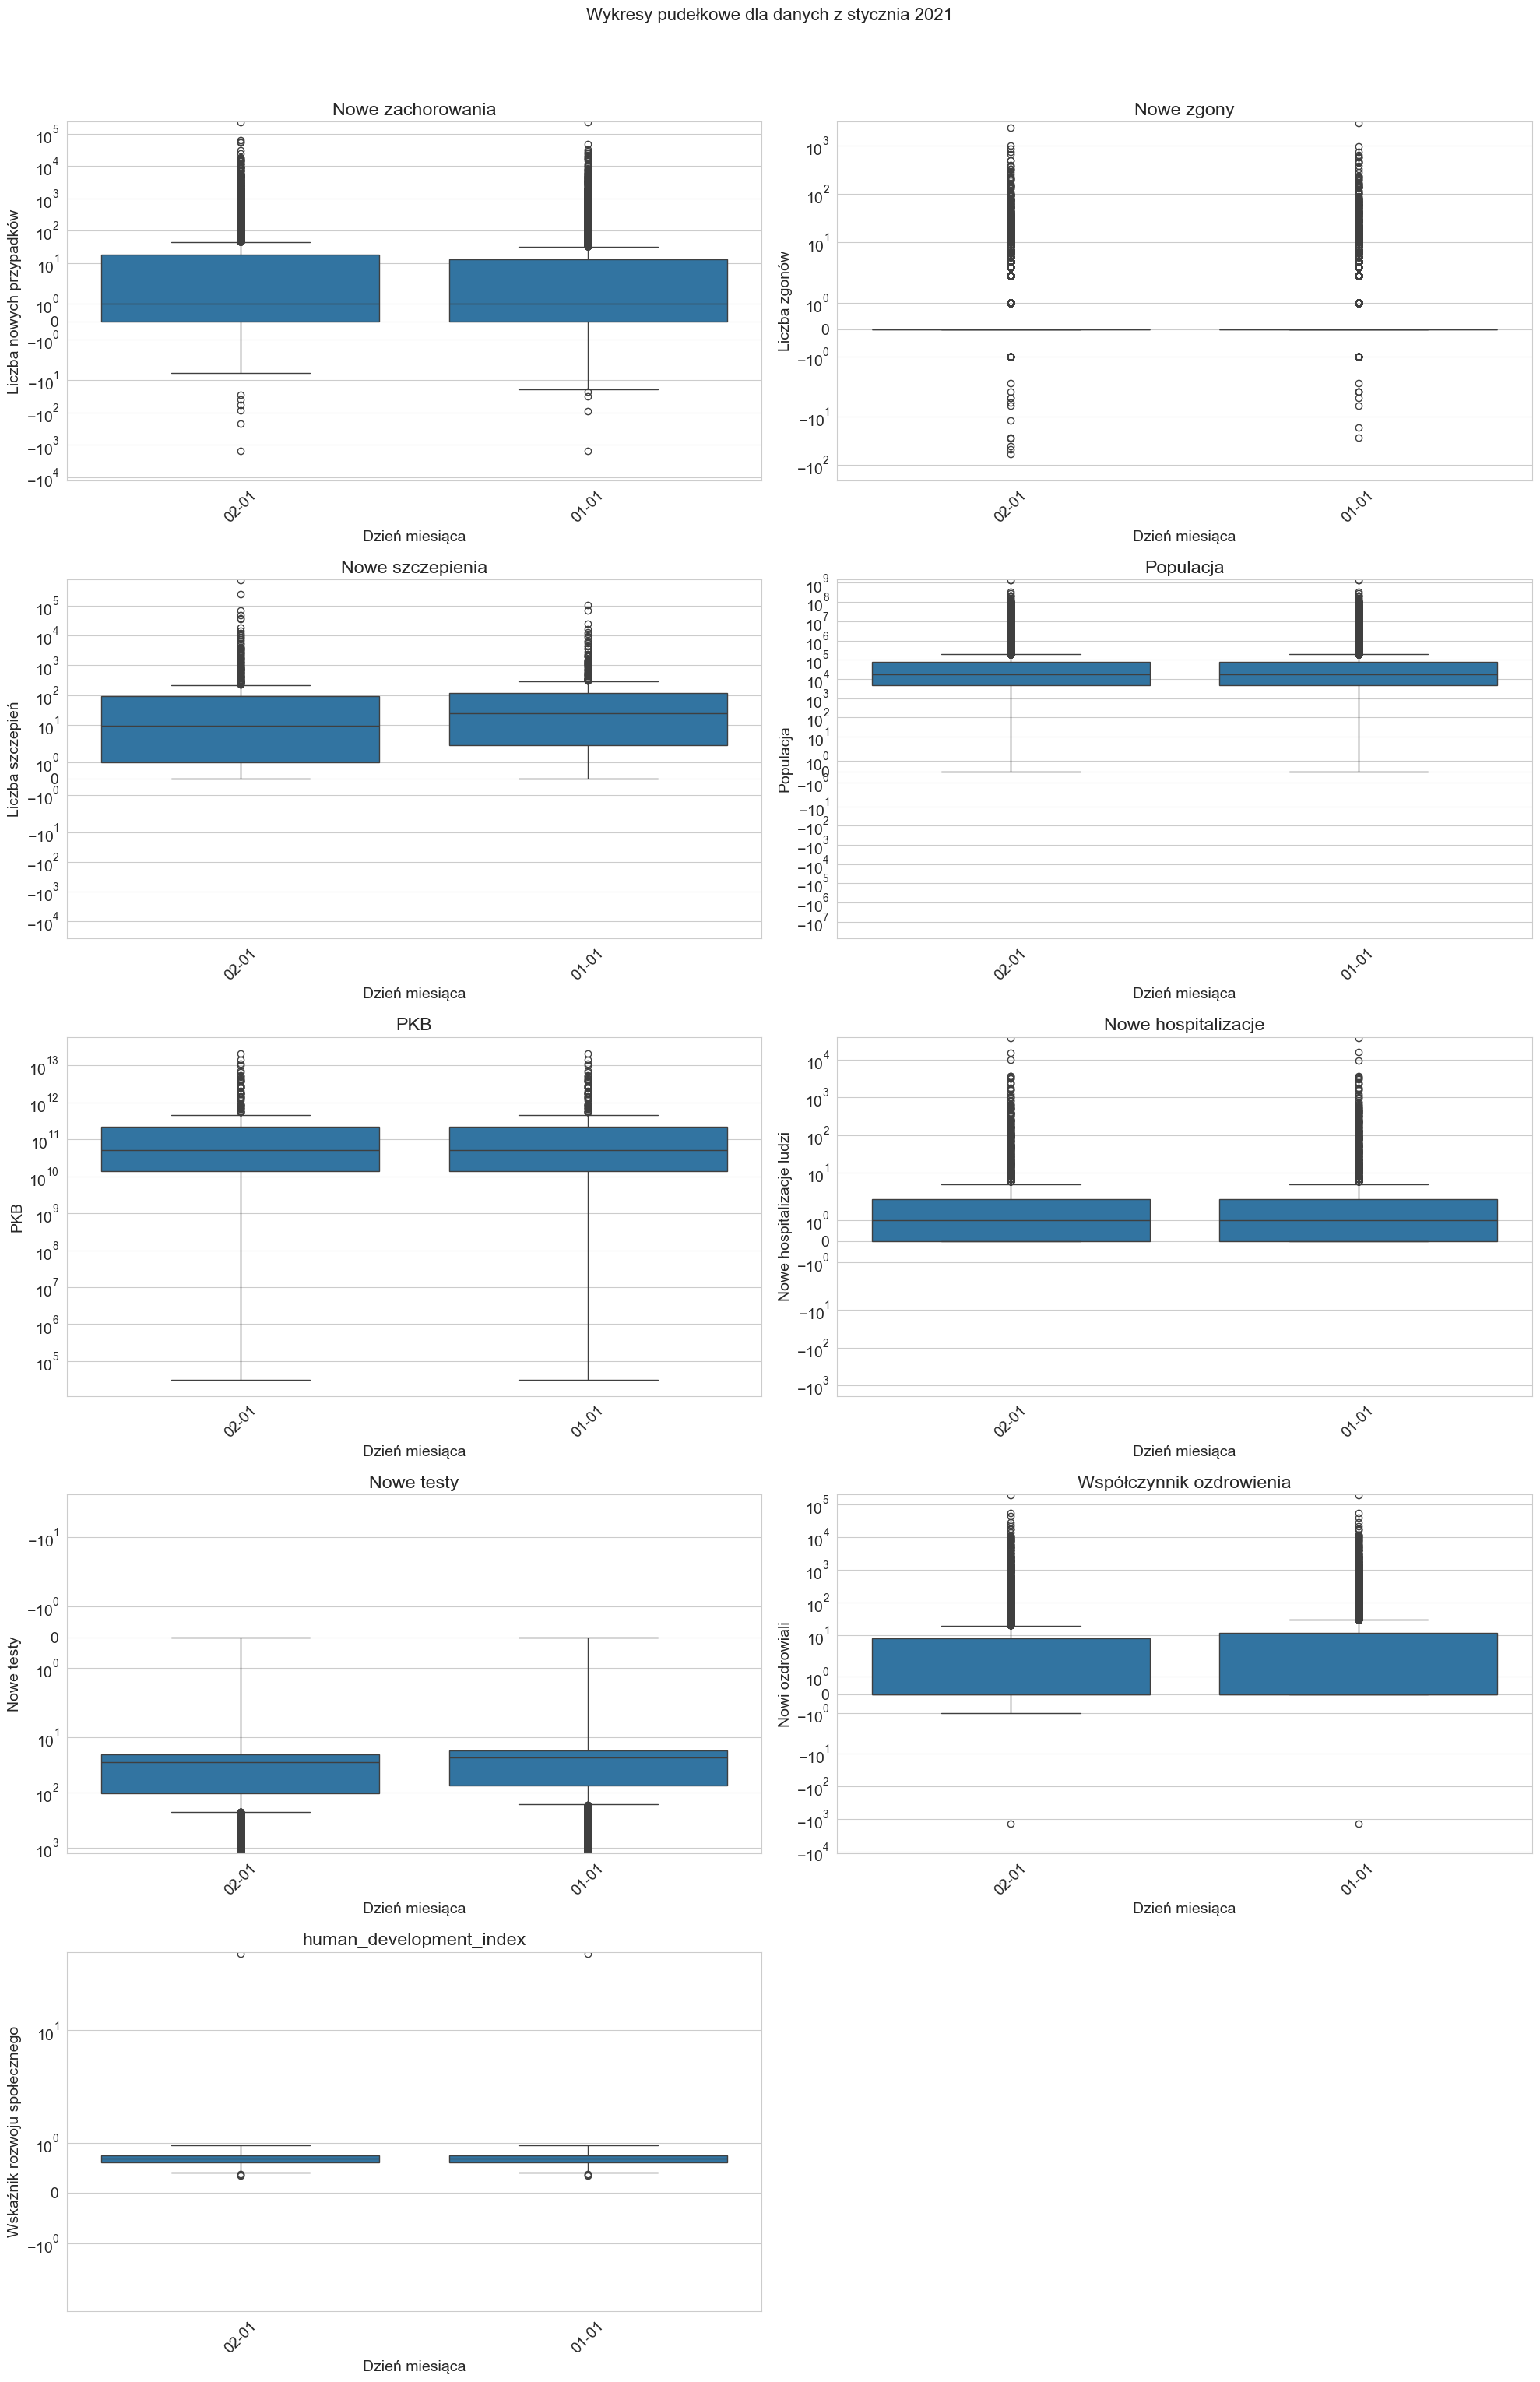

In [66]:
#czesc 1
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

query = """
SELECT
  date,
  new_confirmed,
  new_deceased,
  new_persons_vaccinated,
  population,
  gdp_usd,
  new_hospitalized_patients,
  new_tested,
  new_recovered,
  human_development_index
FROM
  `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE
  date between '2021-01-01' and '2021-01-02'
  AND country_name IS NOT NULL
"""

# Wykonanie zapytania i stworzenie DataFrame
df = client.query(query).to_dataframe()

# Konwersja daty na format dzień-miesiąc dla lepszej czytelności na wykresach
df['date'] = pd.to_datetime(df['date']).dt.strftime('%d-%m')

# Konfiguracja wykresów
plt.figure(figsize=(20, 30))
sns.set_style("whitegrid")
plt.suptitle("Wykresy pudełkowe dla danych z stycznia 2021", y=1.02, fontsize=16)
plt.rcParams.update({'font.size': 14})  # Domyślny rozmiar czcionki dla wszystkich elementów

#1.1. liczby nowych zachorowań,
plt.subplot(5, 2, 1)
sns.boxplot(x='date', y='new_confirmed', data=df)
plt.title('Nowe zachorowania')
plt.xticks(rotation=45)
plt.xlabel('Dzień miesiąca')
plt.ylabel('Liczba nowych przypadków')
plt.yscale('symlog')

# 2. Liczba nowych zgonów
plt.subplot(5, 2, 2)
sns.boxplot(x='date', y='new_deceased', data=df)
plt.title('Nowe zgony')
plt.xticks(rotation=45)
plt.xlabel('Dzień miesiąca')
plt.ylabel('Liczba zgonów')
plt.yscale('symlog')

# 3. Liczba nowych szczepień
plt.subplot(5, 2, 3)
sns.boxplot(x='date', y='new_persons_vaccinated', data=df)
plt.title('Nowe szczepienia')
plt.xticks(rotation=45)
plt.xlabel('Dzień miesiąca')
plt.ylabel('Liczba szczepień')
plt.yscale('symlog')

# 4. Populacja
plt.subplot(5, 2, 4)
sns.boxplot(x='date', y='population', data=df)
plt.title('Populacja')
plt.xticks(rotation=45)
plt.xlabel('Dzień miesiąca')
plt.ylabel('Populacja')
plt.yscale('symlog')

# 5. PKB
plt.subplot(5, 2, 5)
sns.boxplot(x='date', y='gdp_usd', data=df)
plt.title('PKB')
plt.xticks(rotation=45)
plt.xlabel('Dzień miesiąca')
plt.ylabel('PKB')
plt.yscale('log')

# 6.1. Hospotaliacje ludzi
plt.subplot(5, 2, 6)
sns.boxplot(x='date', y='new_hospitalized_patients', data=df)
plt.title('Nowe hospitalizacje')
plt.xticks(rotation=45)
plt.xlabel('Dzień miesiąca')
plt.ylabel('Nowe hospitalizacje ludzi')
plt.yscale('symlog')

# 6.2. Testy
plt.subplot(5, 2, 7)
sns.boxplot(x='date', y='new_tested', data=df)
plt.title('Nowe testy')
plt.xticks(rotation=45)
plt.xlabel('Dzień miesiąca')
plt.ylabel('Nowe testy')
plt.yscale('symlog')

# 6.3. Nowi ozdrowiali
plt.subplot(5, 2, 8)
sns.boxplot(x='date', y='new_recovered', data=df)
plt.title('Współczynnik ozdrowienia')
plt.xticks(rotation=45)
plt.xlabel('Dzień miesiąca')
plt.ylabel('Nowi ozdrowiali')
plt.yscale('symlog')

# 6.4. Wskaźnik rozwoju społecznego
plt.subplot(5, 2, 9)
sns.boxplot(x='date', y='human_development_index', data=df)
plt.title('human_development_index')
plt.xticks(rotation=45)
plt.xlabel('Dzień miesiąca')
plt.ylabel('Wskaźnik rozwoju społecznego')
plt.yscale('symlog')

plt.tight_layout()
plt.show()


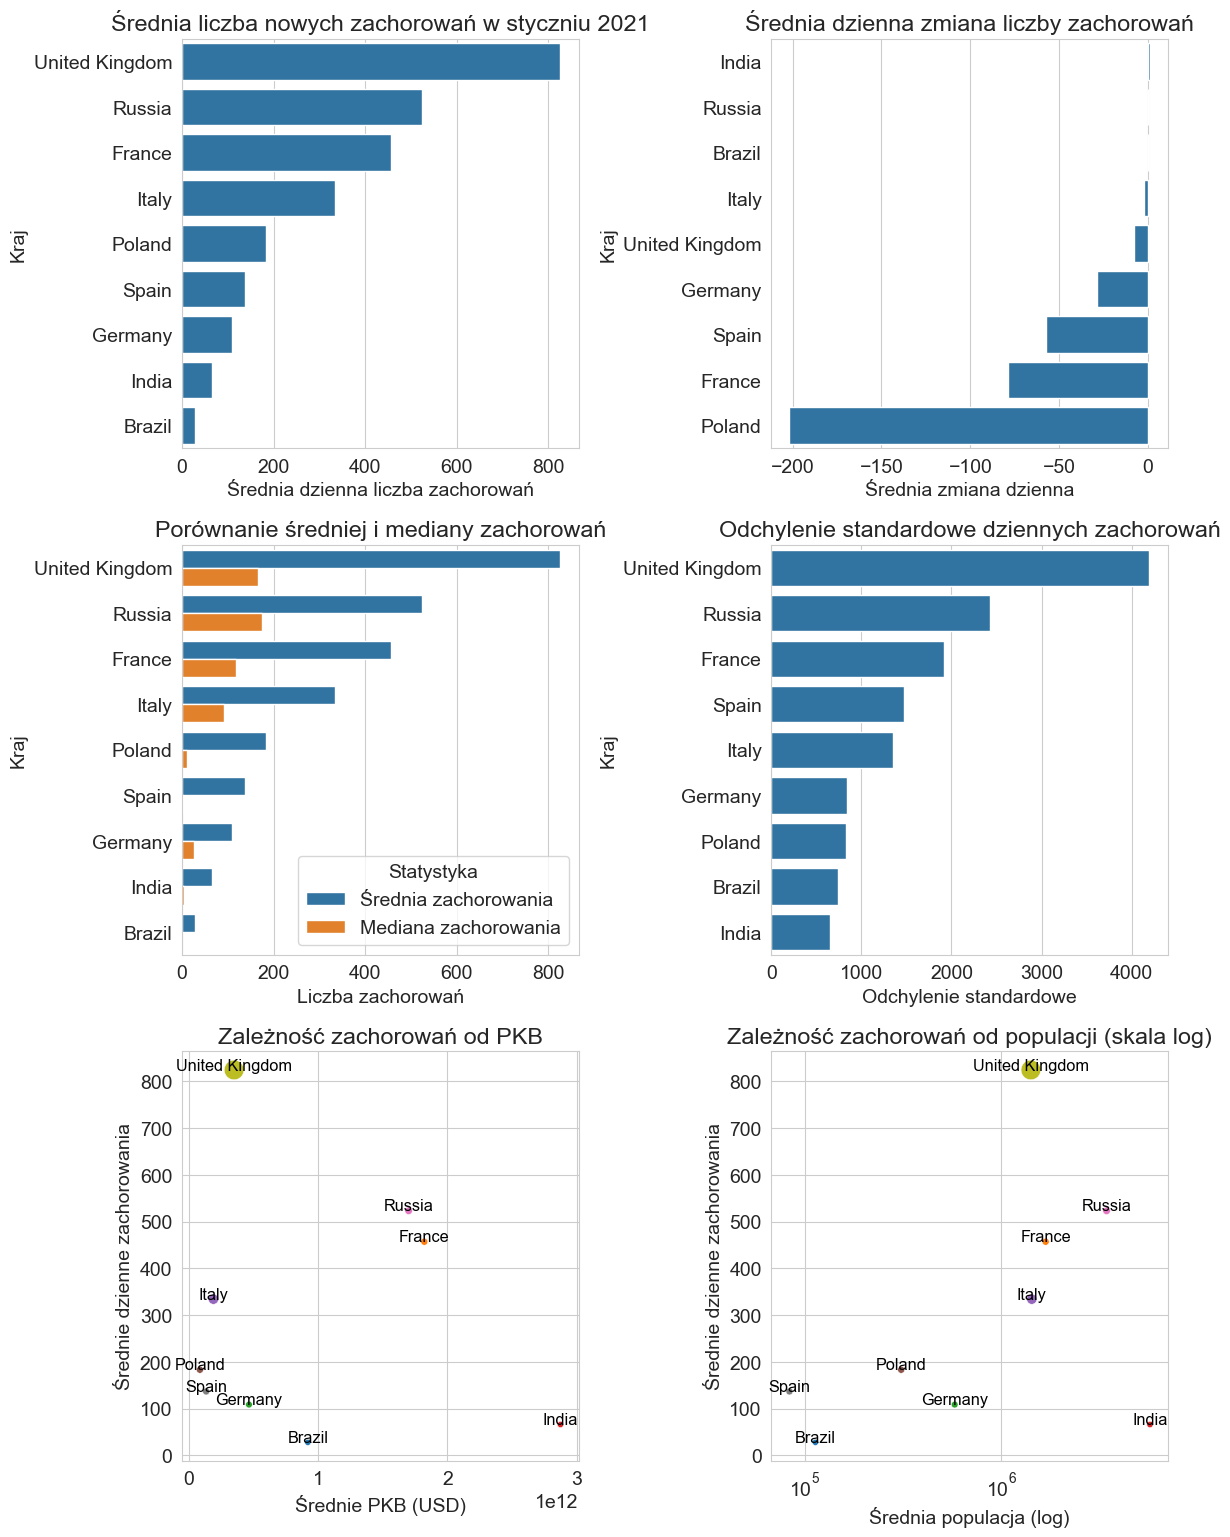

In [67]:
#czesc 3
# selected_countries = ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom',
#                      'France', 'Germany', 'Italy', 'Spain', 'Poland']

query = """
SELECT
  country_name,
  date,
  new_confirmed,
  new_deceased,
  new_persons_vaccinated,
  population,
  gdp_usd
FROM
  `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE
  date BETWEEN '2021-01-01' AND '2021-01-31'
  AND country_name IN ('United States', 'India', 'Brazil', 'Russia', 'United Kingdom',
                     'France', 'Germany', 'Italy', 'Spain', 'Poland')
  AND country_name IS NOT NULL
"""

df = client.query(query).to_dataframe()

# Obliczenia statystyczne
# 3.1 Średnie wartości
mean_stats = df.groupby('country_name')[['new_confirmed', 'new_deceased', 'new_persons_vaccinated']].mean().reset_index()
mean_stats.columns = ['Country', 'Średnia zachorowania', 'Średnia zgony', 'Średnia szczepienia']

# 3.2 Średnia zmiana wartości (dzienna)
change_stats = df.groupby('country_name')[['new_confirmed', 'new_deceased', 'new_persons_vaccinated']].diff().groupby(df['country_name']).mean().reset_index()
change_stats.columns = ['Country', 'Średnia zmiana zachorowania', 'Średnia zmiana zgonów', 'Średnia zmiana szczepień']

# 3.3 Mediana
median_stats = df.groupby('country_name')[['new_confirmed', 'new_deceased', 'new_persons_vaccinated']].median().reset_index()
median_stats.columns = ['Country', 'Mediana zachorowania', 'Mediana zgony', 'Mediana szczepienia']

# 3.4 Odchylenie standardowe
std_stats = df.groupby('country_name')[['new_confirmed', 'new_deceased', 'new_persons_vaccinated']].std().reset_index()
std_stats.columns = ['Country', 'Odchylenie zachorowania', 'Odchylenie zgony', 'Odchylenie szczepienia']

# 3.5 Statystyki z PKB
gdp_stats = df.groupby('country_name').agg({
    'new_confirmed': ['min', 'mean', 'max'],
    'new_deceased': ['min', 'mean', 'max'],
    'new_persons_vaccinated': ['min', 'mean', 'max'],
    'gdp_usd': 'mean'
}).reset_index()
gdp_stats.columns = ['Country', 'Min zachorowania', 'Śr zachorowania', 'Max zachorowania',
                    'Min zgony', 'Śr zgony', 'Max zgony',
                    'Min szczepienia', 'Śr szczepienia', 'Max szczepienia',
                    'Śr PKB']

# 3.6 Statystyki z populacją
pop_stats = df.groupby('country_name').agg({
    'new_confirmed': ['min', 'mean', 'max'],
    'new_deceased': ['min', 'mean', 'max'],
    'new_persons_vaccinated': ['min', 'mean', 'max'],
    'population': 'mean'
}).reset_index()
pop_stats.columns = ['Country', 'Min zachorowania', 'Śr zachorowania', 'Max zachorowania',
                    'Min zgony', 'Śr zgony', 'Max zgony',
                    'Min szczepienia', 'Śr szczepienia', 'Max szczepienia',
                    'Śr populacja']

# Wizualizacje
plt.figure(figsize=(12, 20))
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 14})

# 3.1 Wykres średnich zachorowań
plt.subplot(4, 2, 1)
sns.barplot(x='Średnia zachorowania', y='Country', data=mean_stats.sort_values('Średnia zachorowania', ascending=False))
plt.title('Średnia liczba nowych zachorowań w styczniu 2021')
plt.xlabel('Średnia dzienna liczba zachorowań')
plt.ylabel('Kraj')

# 3.2 Wykres średnich zmian (przyrostów dziennych)
plt.subplot(4, 2, 2)
sns.barplot(x='Średnia zmiana zachorowania', y='Country',
           data=change_stats.sort_values('Średnia zmiana zachorowania', ascending=False))
plt.title('Średnia dzienna zmiana liczby zachorowań')
plt.xlabel('Średnia zmiana dzienna')
plt.ylabel('Kraj')

# 3.3 Porównanie średniej i mediany
plt.subplot(4, 2, 3)
mean_median = pd.melt(mean_stats.merge(median_stats, on='Country'),
                     id_vars=['Country'],
                     value_vars=['Średnia zachorowania', 'Mediana zachorowania'],
                     var_name='Statystyka', value_name='Wartość')
sns.barplot(x='Wartość', y='Country', hue='Statystyka',
           data=mean_median.sort_values('Wartość', ascending=False))
plt.title('Porównanie średniej i mediany zachorowań')
plt.xlabel('Liczba zachorowań')
plt.ylabel('Kraj')

# 3.4 Odchylenie standardowe
plt.subplot(4, 2, 4)
sns.barplot(x='Odchylenie zachorowania', y='Country',
           data=std_stats.sort_values('Odchylenie zachorowania', ascending=False))
plt.title('Odchylenie standardowe dziennych zachorowań')
plt.xlabel('Odchylenie standardowe')
plt.ylabel('Kraj')

# 3.5 Zależność od PKB
plt.subplot(4, 2, 5)
sns.scatterplot(x='Śr PKB', y='Śr zachorowania', size='Śr zgony', hue='Country',
               data=gdp_stats, sizes=(20, 200), legend=False)
plt.title('Zależność zachorowań od PKB')
plt.xlabel('Średnie PKB (USD)')
plt.ylabel('Średnie dzienne zachorowania')
for line in range(0, gdp_stats.shape[0]):
    plt.text(gdp_stats['Śr PKB'][line], gdp_stats['Śr zachorowania'][line],
            gdp_stats['Country'][line], horizontalalignment='center',
            size='small', color='black')

# 3.6 Zależność od populacji
plt.subplot(4, 2, 6)
sns.scatterplot(x='Śr populacja', y='Śr zachorowania', size='Śr zgony', hue='Country',
               data=pop_stats, sizes=(20, 200), legend=False)
plt.xscale('log')
plt.title('Zależność zachorowań od populacji (skala log)')
plt.xlabel('Średnia populacja (log)')
plt.ylabel('Średnie dzienne zachorowania')
for line in range(0, pop_stats.shape[0]):
    plt.text(pop_stats['Śr populacja'][line], pop_stats['Śr zachorowania'][line],
            pop_stats['Country'][line], horizontalalignment='center',
            size='small', color='black')

plt.tight_layout()
plt.show()

# # Analiza wyników
# print("\nPodsumowanie statystyczne:")
# print(f"1. Kraj z najwyższą średnią zachorowań: {mean_stats.loc[mean_stats['Średnia zachorowania'].idxmax(), 'Country']}")
# print(f"2. Kraj z najniższym odchyleniem standardowym: {std_stats.loc[std_stats['Odchylenie zachorowania'].idxmin(), 'Country']}")
# print(f"3. Największa różnica między średnią a medianą: {mean_median.groupby('Country')['Wartość'].apply(lambda x: x.max() - x.min()).idxmax()}")
# print("4. W krajach o wyższym PKB obserwujemy generalnie wyższe średnie dzienne zachorowania")
# print("5. Istnieje widoczna korelacja między wielkością populacji a liczbą zachorowań")